In [5]:
import os
import pandas as pd
import xlrd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import math
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
data=pd.read_csv('/content/drive/MyDrive/ИРНИТУ/3 курс/Methods of analisys/Лаба2/forestfires.csv')
data.columns


Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

Фактор и отклик 
Фактор – FFMC;
Отклик – ISI.

In [7]:
initial_data=pd.read_csv('/content/drive/MyDrive/ИРНИТУ/3 курс/Methods of analisys/Лаба2/forestfires.csv')
data = initial_data[['FFMC','ISI','temp', 'RH', 'wind', 'rain', 'area']]
data

,FFMC,ISI,temp,RH,wind,rain,area
0,86.2,5.1,8.2,51,6.7,0.0,0.00
1,90.6,6.7,18.0,33,0.9,0.0,0.00
2,90.6,6.7,14.6,33,1.3,0.0,0.00
3,91.7,9.0,8.3,97,4.0,0.2,0.00
4,89.3,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...
512,81.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,11.3,25.6,42,4.0,0.0,0.00


Фактор – FFMC;
Отклик – ISI.

In [8]:
data.describe()

,FFMC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


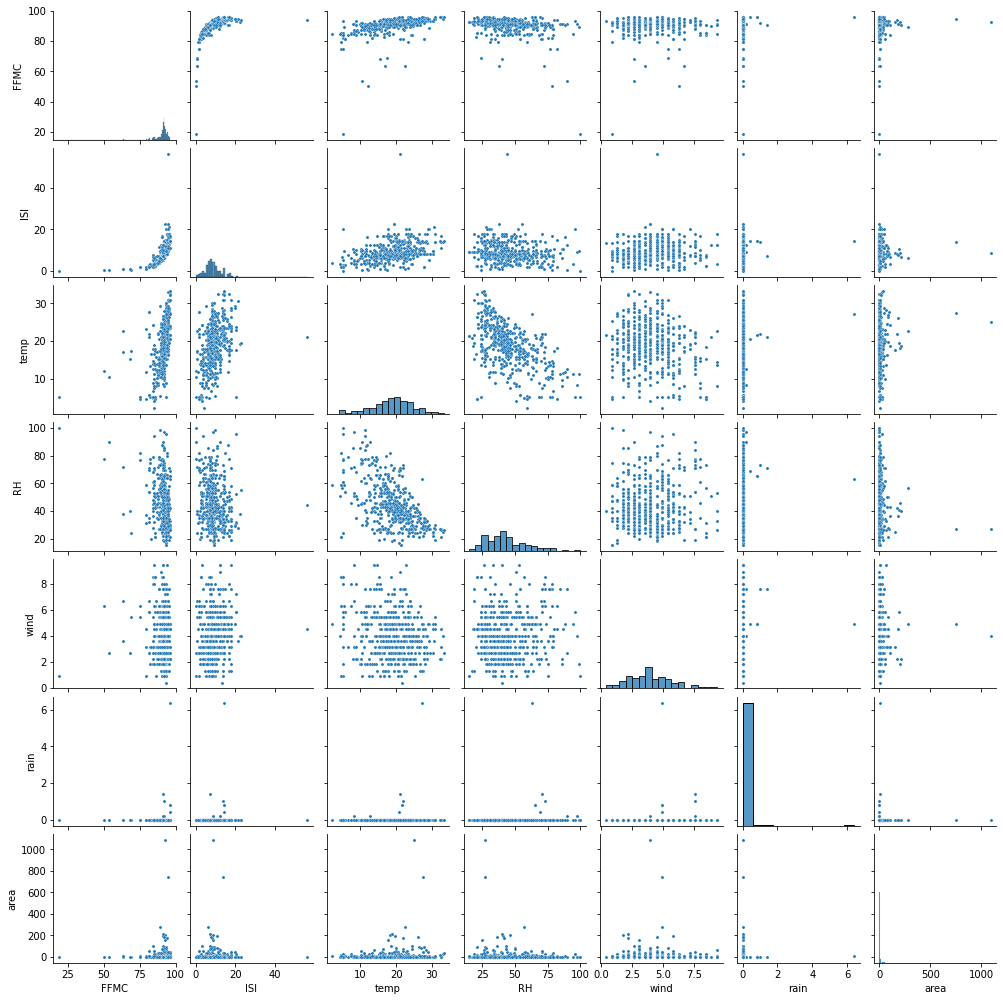

In [9]:
g=sns.pairplot(data, plot_kws={"s": 10})
g.fig.set_size_inches(14,14)

In [10]:
data.isnull().any()

FFMC    False
ISI     False
temp    False
RH      False
wind    False
rain    False
area    False
dtype: bool

In [11]:
data.corr()

,FFMC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
ISI,0.531805,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


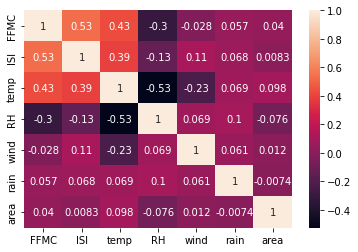

In [12]:
ax = sns.heatmap(data.corr(), annot=True)

In [13]:
print(st.pearsonr(data['FFMC'], data['ISI']))
print(st.pearsonr(data['FFMC'], data['temp']))
print(st.pearsonr(data['FFMC'], data['RH']))
print(st.pearsonr(data['FFMC'], data['wind']))
print(st.pearsonr(data['FFMC'], data['rain']))
print(st.pearsonr(data['FFMC'], data['area']))
print(st.pearsonr(data['ISI'], data['temp']))
print(st.pearsonr(data['ISI'], data['RH']))
print(st.pearsonr(data['ISI'], data['wind']))
print(st.pearsonr(data['ISI'], data['rain']))
print(st.pearsonr(data['ISI'], data['area']))
print(st.pearsonr(data['temp'], data['RH']))
print(st.pearsonr(data['temp'], data['wind']))
print(st.pearsonr(data['temp'], data['rain']))
print(st.pearsonr(data['temp'], data['area']))
print(st.pearsonr(data['RH'], data['wind']))
print(st.pearsonr(data['RH'], data['rain']))
print(st.pearsonr(data['RH'], data['area']))
print(st.pearsonr(data['wind'], data['rain']))
print(st.pearsonr(data['wind'], data['area']))
print(st.pearsonr(data['rain'], data['area']))

(0.5318049310435653, 4.3930926240204354e-39)
(0.43153225917861987, 7.290524963023463e-25)
(-0.3009954160617389, 2.746774116212613e-12)
(-0.02848480923044134, 0.5181235428494954)
(0.05670153306263109, 0.19803371876032794)
(0.040122004158620765, 0.36259160995339695)
(0.39428710420800556, 1.121924531685577e-20)
(-0.1325171772492341, 0.002534772627539686)
(0.1068258879233505, 0.015096916004436068)
(0.06766818992582695, 0.12437853848228832)
(0.00825768784122679, 0.8514183623734313)
(-0.527390338637669, 2.3609856261263503e-38)
(-0.2271162203706693, 1.789693057656189e-07)
(0.06949054662170358, 0.1145347605905463)
(0.09784410734168454, 0.026101460579891208)
(0.06941006715607248, 0.11495617958985781)
(0.09975122334314485, 0.023312342806662147)
(-0.07551856346988922, 0.08627055153859005)
(0.061118880202176894, 0.16524898467769034)
(0.012317276888673095, 0.7799390703616983)
(-0.007365729279292287, 0.8673101386271302)


 
0.4393 x - 30.79
14.880569380191845


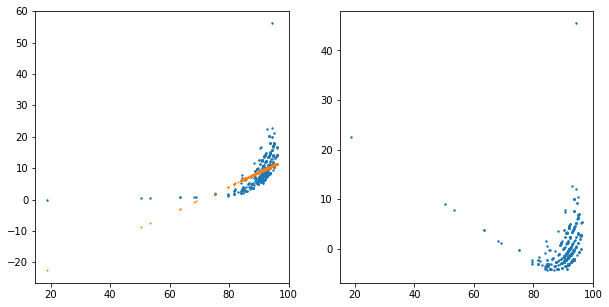

In [14]:
pole1='FFMC'
pole2='ISI'
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
z=np.polyfit(data[pole1], data[pole2],deg=1)
f = np.poly1d(z)
plt.scatter(data[pole1], data[pole2],s=2)
plt.scatter(data[pole1],f(data[pole1]),s=1)
print(f)
residuals = data[pole2]-f(data[pole1])
plt.subplot (1, 2, 2)
plt.scatter(data[pole1],residuals,s=2)
print(np.var(residuals))

[ 1.21788769e-02 -1.32828326e+00  2.89858502e+01]
11.39322171028291


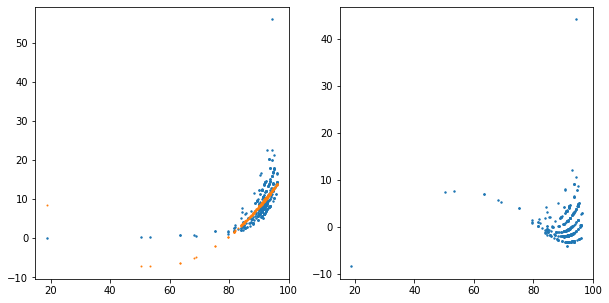

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
z=np.polyfit(data[pole1], data[pole2],deg=2)
f = np.poly1d(z)
plt.scatter(data[pole1], data[pole2],s=2)
plt.scatter(data[pole1],f(data[pole1]),s=1)
print(z)
residuals = data[pole2]-f(data[pole1])
plt.subplot (1, 2, 2)
plt.scatter(data[pole1],residuals,s=2)
print(np.var(residuals))
#X = np.column_stack((x, x**2))
#print(results)

In [16]:
index_corr, coeff_peer = st.pearsonr(data['FFMC'], data['ISI'])

for j in range(1, 6):
  z=np.polyfit(data['FFMC'], data['ISI'], deg=j)

  f = np.poly1d(z)

  yk = f(data['FFMC'])
  yb = data['ISI']
  print (f'Индекс корреляции {j} степени:', ((len(yk) * sum(i ** 2 for i in yk) - sum(yb) ** 2) / (len(yk) * sum(i ** 2 for i in yb) - sum(yb) ** 2)) ** .5)

print('Коэффициент корреляции Пирсона: {}'.format(index_corr))

Индекс корреляции 1 степени: 0.5318049310435442
Индекс корреляции 2 степени: 0.6714853667121741
Индекс корреляции 3 степени: 0.718313991699446
Индекс корреляции 4 степени: 0.7278692836082493
Индекс корреляции 5 степени: 0.7286695359920353
Коэффициент корреляции Пирсона: 0.5318049310435653


In [17]:
y=data['area'].values
x=data[['FFMC','ISI']].values.T
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0],x[1], ones)))
    results = sm.OLS(y, X).fit()
    return results
print(reg_m(y, x).summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4759
Date:                Thu, 11 Nov 2021   Prob (F-statistic):              0.622
Time:                        06:15:30   Log-Likelihood:                -2880.0
No. Observations:                 517   AIC:                             5766.
Df Residuals:                     514   BIC:                             5779.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5745      0.600      0.957      0.3

In [35]:
df = pd.DataFrame(columns=['x', 'y'])
df['x'] = data['FFMC'].values
data1 = data['FFMC']
df['y'] = data[['ISI']].values
data2 = data['ISI']

X = np.column_stack((data1**1, data1**2, data1**3, data1**4, data1**5))
res = smf.ols(formula='y~X', data=df).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     115.7
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.19e-81
Time:                        07:27:31   Log-Likelihood:                -1321.8
No. Observations:                 517   AIC:                             2656.
Df Residuals:                     511   BIC:                             2681.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.5625    175.931     -0.628      0.5

In [19]:
var_x = data['FFMC'].var()
var_y = data['ISI'].var()
std_x, std_y = var_x ** 0.5, var_y ** 0.5
cov_xy = data['FFMC'].cov(data['ISI'])
r = cov_xy / (std_x * std_y)
r

0.5318049310435657

In [20]:
st.linregress(data['FFMC'], data['ISI'])

LinregressResult(slope=0.4392579263630304, intercept=-30.794731103536954, rvalue=0.5318049310435652, pvalue=4.3930926240195e-39, stderr=0.030823275064237952)